In [1]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
train_dataset = dsets.MNIST(root='./data', #把資料抓進來要存在哪裡
                            train=True, #True->抓進來的為訓練資料,False->抓進來的為測試資料
                            transform=transforms.ToTensor(), #資料進來時為圖片,需轉成其他形式
                            download=True) #資料抓進來不要存在root底下,交給變數就好
test_dataset = dsets.MNIST(root='./data',
                            train=False,
                            transform=transforms.ToTensor()) #test_data的download

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [4]:
import matplotlib.pyplot as plt

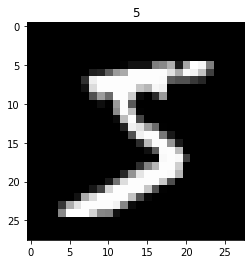

In [5]:
plt.imshow(train_dataset.data[0].numpy(),cmap='gray')
plt.title("%i" % train_dataset.targets[0])
plt.show()

In [6]:
#定義超參數
input_size = 28*28
hidden_size = 500
num_classes = 10
num_epoch = 5
batch_size = 100
learning_rate = 0.001

In [7]:
import torch.utils.data as Data

In [8]:
train_loader = Data.DataLoader(dataset=train_dataset,
                               batch_size=batch_size,
                               shuffle=True)
test_loader = Data.DataLoader(dataset=test_dataset,
                               batch_size=batch_size,
                               shuffle=False)

In [9]:
import torch.nn as nn

In [10]:
#宣告一個類別,繼承torch.nn的module,把網絡搭建起來
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes): #建構值
      super(Model, self).__init__()
      
      #從input layer到隱藏層
      self.fc1 = nn.Linear(input_size, hidden_size)
      self.relu = nn.ReLU()
      
      #從隱藏層到輸出層
      self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
      out = self.fc1(x)
      out = self.relu(out)
      out = self.fc2(out)
      return out

In [11]:
model = Model(input_size, hidden_size, num_classes) #實體化並交給一個變數model

In [12]:
import torch.optim as opt

In [13]:
#Adam-Adaptive Moment Estimation自適應矩估計
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=learning_rate) #將model裡的所有位置拿出來update

In [14]:
from torch.autograd import Variable

In [15]:
#traning
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader): #把data_loader裡的batch拿出來,enumerate幫忙編號
    #要送進data的資料
    images = Variable(images.view(-1,28*28)) #-1:原本100輸出就是100,1000就是1000;view():將整張圖片拉直變成一個向量塞進image
    labels = Variable(labels)
    optimizer.zero_grad() #做歸零的動作
    outputs = model(images)
    loss = loss_fn(outputs, labels) #預測結果放前面,答案放後面
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0: #每100個做一次
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

Epoch:1, Batch:100, Loss:0.2866
Epoch:1, Batch:200, Loss:0.2312
Epoch:1, Batch:300, Loss:0.1729
Epoch:1, Batch:400, Loss:0.2681
Epoch:1, Batch:500, Loss:0.1025
Epoch:1, Batch:600, Loss:0.0757
Epoch:2, Batch:100, Loss:0.0991
Epoch:2, Batch:200, Loss:0.1440
Epoch:2, Batch:300, Loss:0.2050
Epoch:2, Batch:400, Loss:0.0621
Epoch:2, Batch:500, Loss:0.1574
Epoch:2, Batch:600, Loss:0.0628
Epoch:3, Batch:100, Loss:0.0664
Epoch:3, Batch:200, Loss:0.0924
Epoch:3, Batch:300, Loss:0.0751
Epoch:3, Batch:400, Loss:0.0996
Epoch:3, Batch:500, Loss:0.0337
Epoch:3, Batch:600, Loss:0.0373
Epoch:4, Batch:100, Loss:0.0851
Epoch:4, Batch:200, Loss:0.0812
Epoch:4, Batch:300, Loss:0.0186
Epoch:4, Batch:400, Loss:0.0532
Epoch:4, Batch:500, Loss:0.1223
Epoch:4, Batch:600, Loss:0.0622
Epoch:5, Batch:100, Loss:0.0249
Epoch:5, Batch:200, Loss:0.0139
Epoch:5, Batch:300, Loss:0.0241
Epoch:5, Batch:400, Loss:0.0123
Epoch:5, Batch:500, Loss:0.0275
Epoch:5, Batch:600, Loss:0.0314


In [16]:
import torch

In [17]:
#將測試資料放進去，看準確率是多少
correct = 0 #分類正確的數量總共有多少筆
total = 0 #總共有多少筆資料
for images, labels in test_loader: #利用測試資料的dataloader，把資料一個batch一個batch load進來
  images = Variable(images.view(-1,28*28)) #覆蓋掉原本的image，用原本的image做攤平的動作
  outputs = model(images) #size=10的向量
  _, pred = torch.max(outputs.data, 1) #_:最大值(代表沒有名稱的變數)，pred:所在位置(就是我們要預測的結果)，取每個 100*1 tensor的最大值
  correct += (pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%" %(100.0*float(correct)/float(total)))

Accuracy:97.840%


In [18]:
for images, labels in test_loader:
  print(images.shape) #結果可看出原本的60000*28*28，被切成了每100筆為一份資料100*28*28，但因為做了data loader，所以多了一個維度1，之後需要把多的給消掉
  break

  

torch.Size([100, 1, 28, 28])


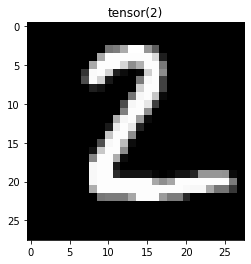

tensor([[ -6.4958,  -9.9961,  -2.2870,   2.1949, -12.5629,  -7.5736, -17.0423,
           9.2554,  -1.7342,  -0.7108],
        [ -6.1617,  -0.5064,  11.4783,  -0.2640, -22.1917,  -2.2269,  -2.9686,
         -16.4039,  -2.3277, -14.9684]], grad_fn=<AddmmBackward0>)
tensor([7, 2])


In [19]:
#送進去的資料的大小不見得是100張圖，可以是任意一張
plt.imshow(images[1][0], cmap="gray") #拿到第二張圖，不加上0的話會是三個維度，現在是4個維度。因為是灰階圖 color map 要給gray
plt.title(labels[1].data)
plt.show()
images_flat = Variable(images[:2].view(-1,28*28)) #用前兩筆資料就好，保留第一個維度，後面資料全部合併在一起
outputs = model(images_flat)
print(outputs)
_, pred_y = torch.max(outputs.data, -1) #這才是最後預測的結果
print(pred_y)

In [20]:
#pytorch 存模型有兩種方式: 1.把parameters存起來就好(較保險) 2.把整個模型存出去(可能會出錯)
#第一種方式:torch有一種方法直接儲存
torch.save(model.state_dict(),"model.pkl") #"model.pkl"為檔名

In [21]:
model2 = Model(input_size, hidden_size, num_classes) #新建一個model
model2.load_state_dict(torch.load("model.pkl")) #將原本訓練好的模型參數覆蓋進去

<All keys matched successfully>

In [22]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28)) #攤平
  outputs = model2(images)
  _, pred = torch.max(outputs.data, 1)
  correct += (pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%" %(100.0*float(correct)/float(total)))

Accuracy:97.840%


In [23]:
#第二種方式
torch.save(model2,"model2.pkl")

In [24]:
model3 = torch.load("model2.pkl")

In [25]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28))
  outputs = model3(images)
  _, pred = torch.max(outputs.data, 1)
  correct += (pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%" %(100.0*float(correct)/float(total)))

Accuracy:97.840%


# **Optimizer方法:SGD,AdaGrad,RMSprop,Adam**

In [26]:
#更精簡的方式:Sequential
model4 = nn.Sequential( #放要疊進去的data,必須按照順序
    nn.Linear(input_size, hidden_size), #第一層:隱藏層,進去的大小和出去的大小
    nn.ReLU(), #activation fuunction
    nn.Linear(hidden_size, num_classes), #實質層
)
print(model)
print(model4)

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [27]:
#SGD-Stochastic Gradient Decent準確率梯度下降法
#Momentum 是「運動量」的意思，此優化器為模擬物理動量的概念，在同方向的維度上學習速度會變快，方向改變的時候學習速度會變慢。
#"一顆球從山上滾下來，在下坡的時候速度越來越快，遇到上坡，方向改變，速度下降"
optimizer = opt.SGD(model4.parameters(), lr=learning_rate, momentum=0.5) #將model裡的所有位置拿出來update

In [28]:
#traning
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader): #把data_loader裡的batch拿出來,enumerate幫忙編號
    #要送進data的資料
    images = Variable(images.view(-1,28*28)) #-1:原本100輸出就是100,1000就是1000;view():將整張圖片拉直變成一個向量塞進image
    labels = Variable(labels)
    optimizer.zero_grad() #做歸零的動作
    outputs = model4(images)
    loss = loss_fn(outputs, labels) #預測結果放前面,答案放後面
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0: #每100個做一次
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

Epoch:1, Batch:100, Loss:2.2747
Epoch:1, Batch:200, Loss:2.2152
Epoch:1, Batch:300, Loss:2.1739
Epoch:1, Batch:400, Loss:2.1234
Epoch:1, Batch:500, Loss:2.0725
Epoch:1, Batch:600, Loss:2.0194
Epoch:2, Batch:100, Loss:1.8905
Epoch:2, Batch:200, Loss:1.8896
Epoch:2, Batch:300, Loss:1.8269
Epoch:2, Batch:400, Loss:1.7532
Epoch:2, Batch:500, Loss:1.6609
Epoch:2, Batch:600, Loss:1.6377
Epoch:3, Batch:100, Loss:1.5446
Epoch:3, Batch:200, Loss:1.5076
Epoch:3, Batch:300, Loss:1.3244
Epoch:3, Batch:400, Loss:1.4350
Epoch:3, Batch:500, Loss:1.3151
Epoch:3, Batch:600, Loss:1.2505
Epoch:4, Batch:100, Loss:1.2674
Epoch:4, Batch:200, Loss:1.0297
Epoch:4, Batch:300, Loss:1.0495
Epoch:4, Batch:400, Loss:1.0821
Epoch:4, Batch:500, Loss:0.9357
Epoch:4, Batch:600, Loss:0.9988
Epoch:5, Batch:100, Loss:1.0321
Epoch:5, Batch:200, Loss:0.8333
Epoch:5, Batch:300, Loss:0.7912
Epoch:5, Batch:400, Loss:0.8778
Epoch:5, Batch:500, Loss:0.7237
Epoch:5, Batch:600, Loss:0.7676


In [29]:
#AdaGrad-Adaptive Gradient自適應梯度
optimizer = opt.Adagrad(model4.parameters(), lr=learning_rate) #將model裡的所有位置拿出來update

In [30]:
#RMSProp-Root_Mean_Square prop方均根傳播
optimizer = opt.RMSprop(model4.parameters(), lr=learning_rate) #將model裡的所有位置拿出來update

In [31]:
#Adam-Adaptive Moment Estimation自適應矩估計(表現最好的optimizer)
optimizer = opt.Adam(model4.parameters(), lr=learning_rate) #將model裡的所有位置拿出來update